## Elementos finitos linear 1D

## Montar a matrix de massa

In [198]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]

stiff_matrix (generic function with 1 method)

In [199]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [200]:
stiff_matrix(0,1)

2x2 Array{Float64,2}:
  1.0  -1.0
 -1.0   1.0

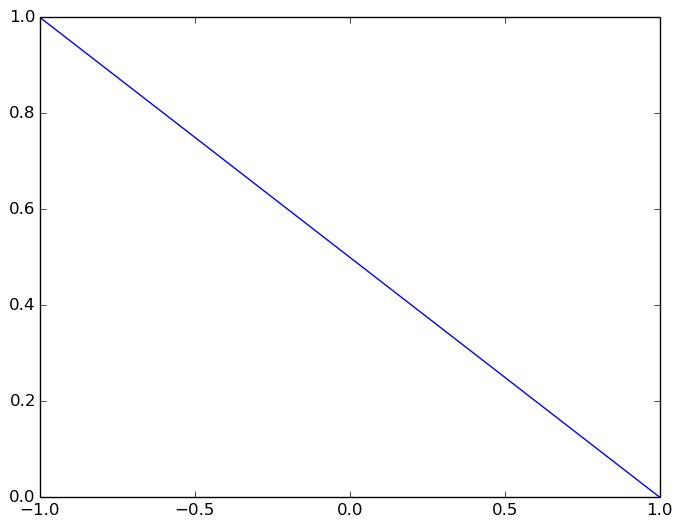

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f103a7f84d0>

In [201]:
x = linspace(-1,1,101)
y1=[ϕ₁(x,-1,1) for x in linspace(-1,1,101)]
plot(x,y1)

In [202]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [203]:
mass_matrix(0,1)

2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [204]:
Nel = 3
a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];


In [205]:
Nel = size(xn,1)-1
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x3 Array{Int64,2}:
 1  2  3
 2  3  4

In [206]:
M = zeros(Ndof, Ndof)

for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end
M

dM = zeros(Ndof, Ndof)

for e = 1:Nel
    dMe = stiff_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            dM[kg,ig] += dMe[k,i]
        end
    end
end
dM2 = dM
dM3 = -dM + M
idx = 2:(Ndof-1)
dM = (-dM + M)[idx,idx]
            

2x2 Array{Float64,2}:
 -2.55556   1.61111
  1.61111  -2.55556

In [207]:
dM2

4x4 Array{Float64,2}:
  1.5  -1.5   0.0   0.0
 -1.5   3.0  -1.5   0.0
  0.0  -1.5   3.0  -1.5
  0.0   0.0  -1.5   1.5

In [208]:
dM3

4x4 Array{Float64,2}:
 -1.27778   1.61111   0.0       0.0    
  1.61111  -2.55556   1.61111   0.0    
  0.0       1.61111  -2.55556   1.61111
  0.0       0.0       1.61111  -1.27778

## Montar o lado direito da equação:

In [209]:
#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 0,y'(1)=0
fun(x) = (1.0 - 4*pi^2)*sin(2*pi*x) 
resp(x) = sin(2*pi*x)


resp (generic function with 1 method)

In [210]:
fe = fun(xn)

4-element Array{Float64,1}:
  -9.42449e-15
  33.3233     
 -33.3233     
   9.42449e-15

In [211]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        
F = F[idx]


2-element Array{Float64,1}:
  11.1078
 -11.1078

## Solução do problema

In [212]:
u = dM\F

2-element Array{Float64,1}:
 -2.66586
  2.66586

In [213]:
u = [0.0; u; 0.0]

4-element Array{Float64,1}:
  0.0    
 -2.66586
  2.66586
  0.0    

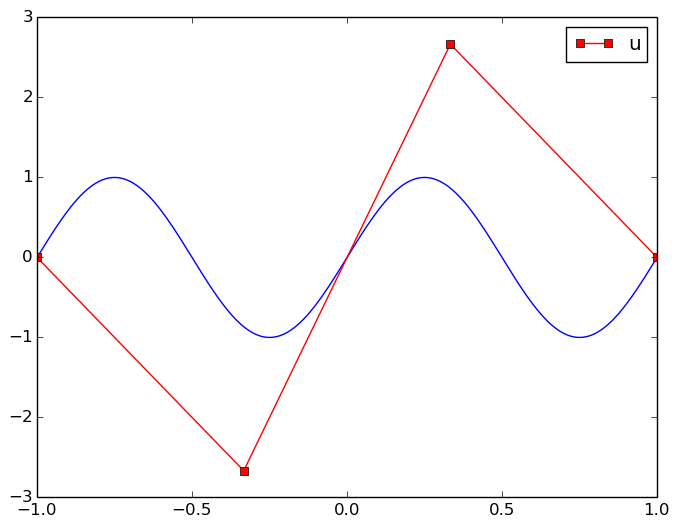

4-element Array{Float64,1}:
  0.0    
 -2.66586
  2.66586
  0.0    

In [214]:
using PyPlot
xx = linspace(a, b, 201)
plot(xx, resp(xx))
plot(xn, u, "rs-",label = "u")
legend()
u

In [215]:
resp(0.1)

0.5877852522924731

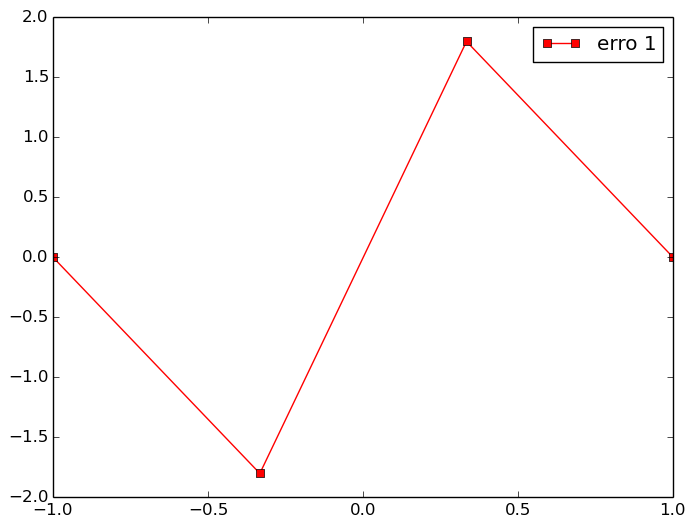

PyObject <matplotlib.legend.Legend object at 0x7f103a647850>

In [216]:
e1 = u - resp(xn)
figure()
plot(xn, e1, "rs-",label="erro 1")
legend()